<h1>Simple Classification</h1>

Author: Aleš Suchomel

Task:

<h3>Import of used packages</h3> 

In [1]:
#Reading csv files
import csv
#Computing and containers
import numpy as np
#Plotting
import matplotlib
import matplotlib.pyplot as plt
#from matplotlib.colors import ListedColormap
%matplotlib inline
#Pro SVM Classificator 
import sklearn.svm as svm
#Data presentation
import pandas as pd

<h3>URLs of used external files</h3>

In [2]:
#CSV files with the data
linSepDataFileURL = 'linsep-traindata.csv'
linSepClassFileURL = 'linsep-trainclass.csv'

nonLinSepDataFileURL = 'nonlinsep-traindata.csv'
nonLinSepClassFileURL = 'nonlinsep-trainclass.csv'

In [3]:
#Loading

In [4]:
 # Training the Perceptron
    #
    # Inputs
    # x:   feature data
    # y:   outputs
    # z:   threshold
    # eta: learning rate
    # t:   number of iterations
def loadDataFromCSVFile(fileURL):    
    dataFile = open(fileURL)   
    dataReader = csv.reader(dataFile)
    data = list(dataReader)
    data = np.array(data).astype("float")
    dataFile.close() 
    return data

linSepData = loadDataFromCSVFile(linSepDataFileURL)
linSepClasses = loadDataFromCSVFile(linSepClassFileURL)
    

In [5]:
#Vypsat hezcejc nactreny hodnoty panda
df = pd.DataFrame(np.append(linSepData, linSepClasses, axis=1),columns=['X1','X2','class'])
pd.set_option('display.max_columns',17)
display(df.T)
#Neco pridat jako text

,0,1,2,3,4,5,6,7,...,92,93,94,95,96,97,98,99
X1,2.0009,4.845700,4.17110,1.4660,6.05990,1.3872,0.57898,0.41096,...,-4.6567,-4.4480,-5.1088,-2.5519,-4.1622,-3.2379,-4.3434,-4.2989
X2,4.6848,0.076542,0.50986,5.8026,0.84003,7.3061,1.86560,4.43820,...,-4.8184,-3.7235,-2.7171,-3.4786,-3.5400,-2.3194,-3.4183,-3.7629
class,-1.0000,-1.000000,-1.00000,-1.0000,-1.00000,-1.0000,-1.00000,-1.00000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [6]:
#Text

In [7]:
def shufflePoints(points, classes, seed = 'no'):
    XX = np.append(points, classes, axis=1)
    rand = np.random
    if seed != 'no':
        rand.seed(seed)
    rand.shuffle(XX)
    points = XX[:,0:2]
    classes = XX[:,2,None]
    return points, classes

linSepData, linSepClasses = shufflePoints(linSepData, linSepClasses, 5)


In [8]:
#Plotting do dvou fci

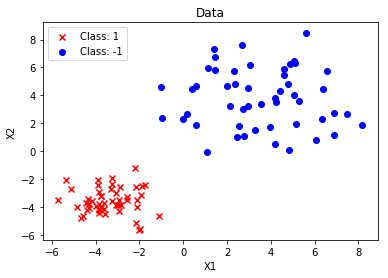

In [9]:
def plotPoints(points, classes):

    X1 = points[classes[:,0]==1,:]
    X2 = points[classes[:,0]==-1,:]
    
    plt.scatter(X1[:,0],X1[:,1], c='r', marker='x', label='Class: 1')
    plt.scatter(X2[:,0],X2[:,1], c='b', marker='o', label='Class: -1')
          
    plt.legend(loc='upper left')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Data')
    
plotPoints(linSepData, linSepClasses) 
plt.show()

<h3>My Perceptron</h3> 

In [10]:
class myPerceptron:
    # X:   feature data
    # y:   classes
    # eta: learning rate
    # t:   number of iterations
    # weights
    def __init__(self, eta = 0.1, MAX_ITERATIONS = 1000):
        self.eta = eta
        self.MAX_ITERATIONS = MAX_ITERATIONS
        self.weights = np.zeros(3)
        
    def predict(self, points):#prepsat
        Z = []
        r = 1
        if len(points.shape)<=1:
            points=[points]
        for row in points:
            xx = np.array([float(-1),row[0],row[1]])
            value = np.sum(self.weights*xx)  
            if value > 0: 
                Z.append(-1)
            else:
                Z.append(1)    
        return np.array(Z)
    
    def countErrors(self, points, classes):
        errors = 0
        ind = 0
        for p in points:
            guessedClass = self.predict(p)
            errors += abs((guessedClass - classes[ind])/2)
            ind += 1
        return int(errors)   
    
    def fit(self, trainPoints, classes): #Stochastic gradient descent
        self.weights = np.zeros(3)
        errors = 1
        index = 0
        while index < self.MAX_ITERATIONS and errors != 0: #self.weights
            indexClass = 0
            for p in trainPoints:
                guessedClass = self.predict(p)
                error = (guessedClass[0] - classes[indexClass])/2
                xx = np.array([float(-1),p[0],p[1]])
                self.weights += xx*error*self.eta         
                indexClass+=1
            index += 1
            errors = self.countErrors(trainPoints,classes)
            
my = myPerceptron()
my.fit(linSepData, linSepClasses)
print('Number of wrongly classified training points: ' + str(my.countErrors(linSepData, linSepClasses)))
    

Number of wrongly classified training points: 0


Plot

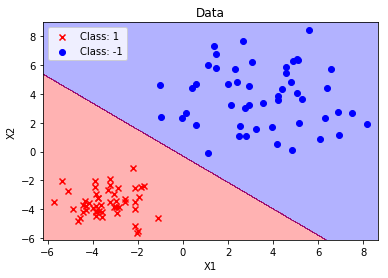

In [12]:
def plotClassification(points, classes, classifier):
 
    colors = ('blue','red')
    step = 0.02

    x0Min = points[:,0].min() - 0.5 
    x0Max = points[:,0].max() + 0.5
    x1Min = points[:,1].min() - 0.5
    x1Max = points[:,1].max() + 0.5
    
    x0 = np.arange(x0Min, x0Max, step)
    x1 = np.arange(x1Min, x1Max, step)
    xx0, xx1 = np.meshgrid(x0,x1)

    allX = np.array([xx0.ravel(), xx1.ravel()]).T
    Z = classifier.predict(allX)
    Z = Z.reshape(xx0.shape)
    
    plt.contourf(xx0, xx1, Z, alpha = 0.3, colors = colors)   
    plotPoints(points, classes)
    
plotClassification(linSepData, linSepClasses, my) 
plt.show()

Test

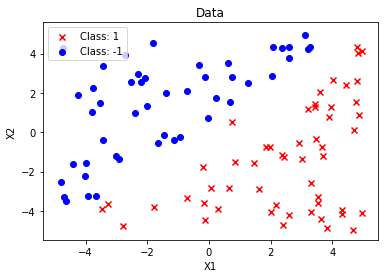

In [13]:
#Definitivne do funkce
def generateLinSepData(a = 1, b = 0, nData = 100, minDistance = 0.1, seed = 'no'):    
    
    rand = np.random
    if seed != 'no':
        rand.seed(seed)        
    data = rand.random([nData,2]) * 10 - 5
        
    x1Distance = a * data[:,0,None] + b - data[:,1,None]
    x1Conditions = [x1Distance <= -minDistance, x1Distance >= minDistance, abs(x1Distance)<minDistance]
    x1Classes = np.select(x1Conditions,[-1, 1, 0])
    
    x2Distance = (data[:,1,None] - b) / a - data[:,0,None]
    x2Conditions = [abs(x2Distance)<minDistance, abs(x2Distance)>=minDistance]
    x2Classes = np.select(x2Conditions,[0,1])    
    classes = np.multiply(x1Classes,x2Classes)
    
    data = data[classes[:,0]!=0]
    classes = classes[classes[:,0]!=0]
    
    return(data,classes)

randomData,randomClasses = generateLinSepData()
plotPoints(randomData,randomClasses)
plt.show()

In [14]:
def classificatorTest(classifier, iterations = 100, nData = 100, minDistance = 0.1):
    
    errors = 0
    errorSamplesList = []
    r = np.random
    for i in range(iterations):
        a = r.random() * 20 - 10
        b = r.random() * 10 - 5
        randomData, randomClasses = generateLinSepData(a,b, minDistance = minDistance, nData = nData)
        classifier.fit(randomData, randomClasses)
        er = classifier.countErrors(randomData, randomClasses)           
        if er != 0:
            errors += er
            print('Incorrect classification of ' + str(er) + 'points was observed.')
            plotClassification(randomData, randomClasses, classifier)
            plt.show()
            errorSamplesList.append([randomData, randomClasses])
            
    Text1 = 'A perceptron test was performed. There were ' + str(iterations) \
            + ' training sets of ' + str(nData) + ' randomly generated linearly separable points. \n'
    print(Text1)
    if errors == 0:
        Text2 = 'During the test, no point was badly classified. \n' 
    else:
        Text2 = 'Overall, there occured ' + str(errors) + ' errors. The samples with incorrect' \
        + ' classification are shown above. \n'
    print(Text2)
    return (errorSamplesList)
erList = classificatorTest(myPerceptron())    

A perceptron test was performed. There were 100 training sets of 100 randomly generated linearly separable points. 

During the test, no point was badly classified. 



<h3>Problems</h3>

Good solution

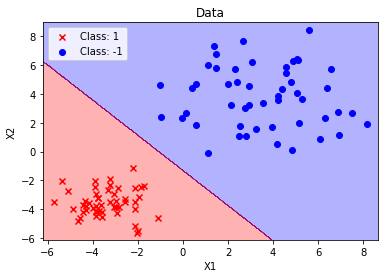

In [15]:
linearSVM = svm.SVC(kernel = 'linear') 
linearSVM.fit(linSepData, linSepClasses[:,0])
plotClassification(linSepData, linSepClasses,linearSVM) 
plt.show()

Linear non-separable data

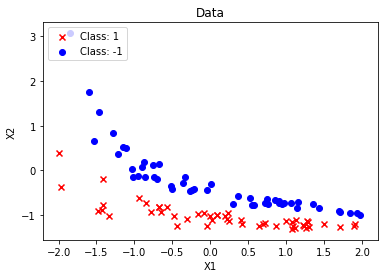

In [16]:
dataNon = loadDataFromCSVFile(nonLinSepDataFileURL)
classNon = loadDataFromCSVFile(nonLinSepClassFileURL)
shufflePoints(dataNon, classNon, 5)
plotPoints(dataNon, classNon)      
plt.show()

My prerceptron

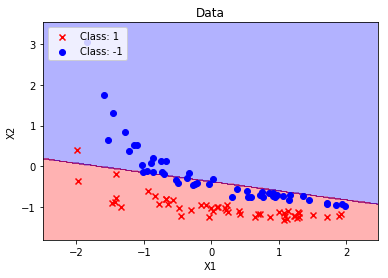

In [17]:
my = myPerceptron()
my.fit(dataNon, classNon)
plotClassification(dataNon, classNon,my)
plt.show()    

Comparition

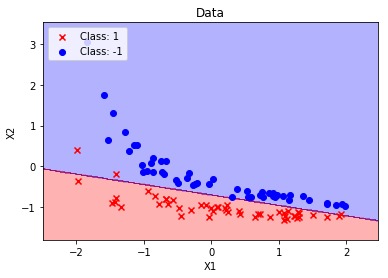

In [18]:
linear = svm.SVC(kernel='linear') 
linear.fit(dataNon, classNon[:,0])
plotClassification(dataNon, classNon,linear)
plt.show()

Better solution

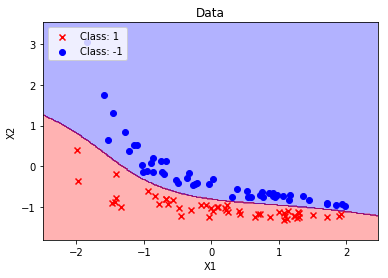

In [19]:
mod = svm.SVC(kernel='rbf', random_state=0, gamma=0.5, C=10)
mod.fit(dataNon, classNon[:,0])
plotClassification(dataNon, classNon, mod)

Conclusion

<h3>Citace</h3>

https://jtsulliv.github.io/perceptron/ 
https://pdfs.semanticscholar.org/6174/3124c2a4b4e550731ac39508c7d18e520979.pdf
https://chrisalbon.com/machine_learning/support_vector_machines/svc_parameters_using_rbf_kernel/
http://www.3dmatics.com/blog/2014/11/artificial-linearly-separable-test-data-in-python/
https://machinelearningmastery.com/implement-perceptron-algorithm-scratch-python/
ta knihovna
+ wikipedie ruzne
